In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.shape

(270, 14)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [ ]:
df.nunique()

,0
Age,41
Sex,2
Chest pain type,4
BP,47
Cholesterol,144
FBS over 120,2
EKG results,3
Max HR,90
Exercise angina,2
ST depression,39


In [ ]:
#Storing columns containing categorical and continuous data in seperate lists
categorical = []
continuous = []
for col in df.columns:
    if len(df[col].unique()) <= 5:
        categorical.append(col)
    else:
        continuous.append(col)

In [ ]:
categorical

['Sex',
 'Chest pain type',
 'FBS over 120',
 'EKG results',
 'Exercise angina',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

In [ ]:
continuous

['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

EDA

In [ ]:
#Color codes
heartred = '#D76F80'
heartblue = '#C7CBE5'
heartyellow = '#FEE5B3'
heartbrown = '#450E10'

categorical data

<Axes: xlabel='Heart Disease', ylabel='count'>

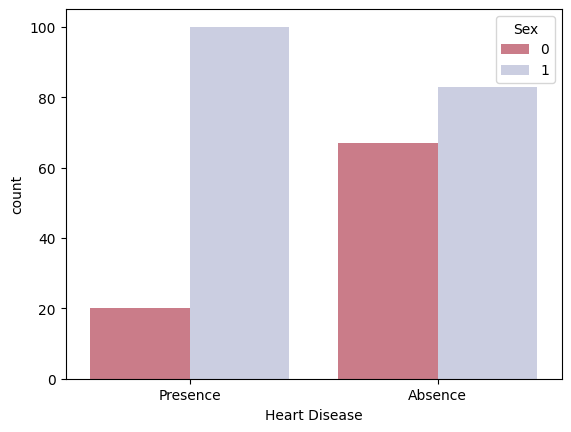

In [ ]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Sex', palette = [heartred, heartblue])

<Axes: xlabel='Heart Disease', ylabel='count'>

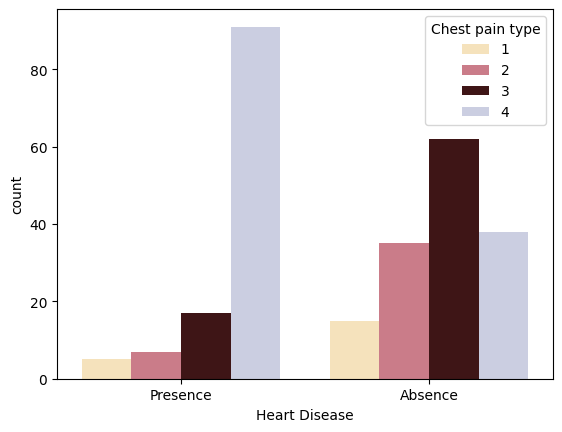

In [ ]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Chest pain type', palette = [heartyellow, heartred, heartbrown, heartblue])

<Axes: xlabel='Heart Disease', ylabel='count'>

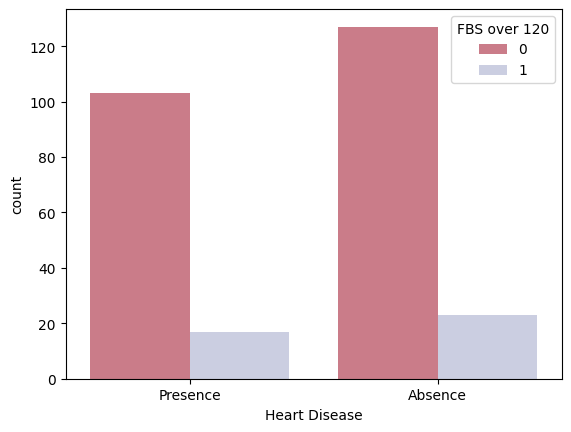

In [ ]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'FBS over 120', palette = [heartred, heartblue])

<Axes: xlabel='Heart Disease', ylabel='count'>

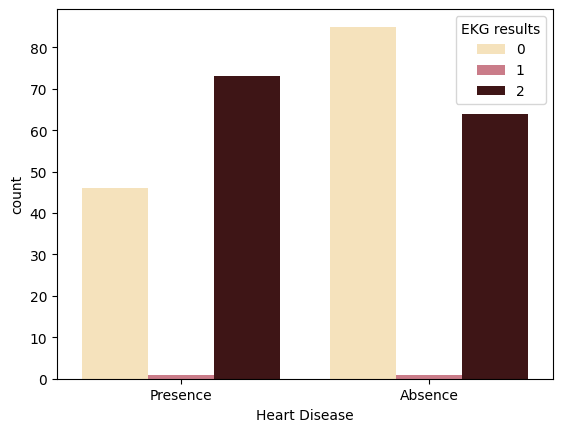

In [ ]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'EKG results', palette = [heartyellow, heartred, heartbrown])

<Axes: xlabel='Heart Disease', ylabel='count'>

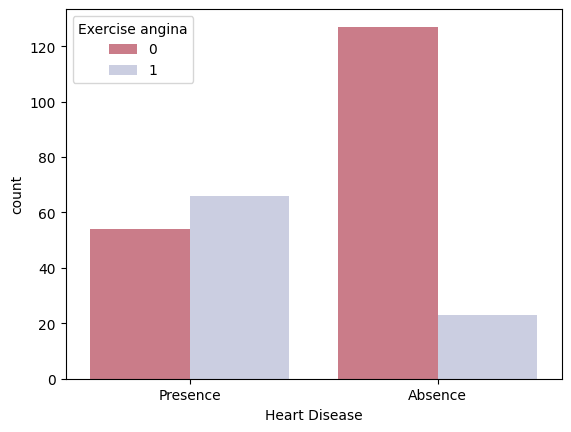

In [ ]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Exercise angina', palette = [heartred, heartblue])

<Axes: xlabel='Heart Disease', ylabel='count'>

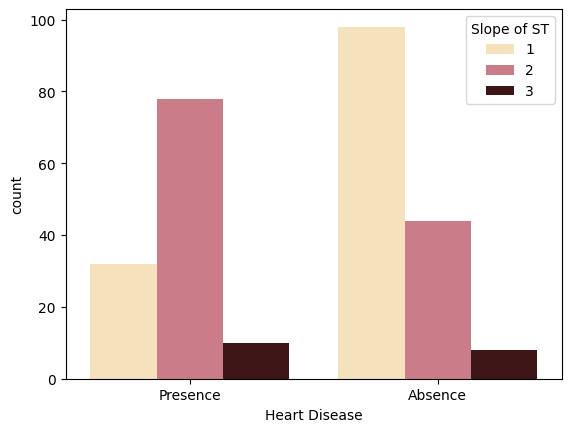

In [ ]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Slope of ST', palette = [heartyellow, heartred, heartbrown])

<Axes: xlabel='Heart Disease', ylabel='count'>

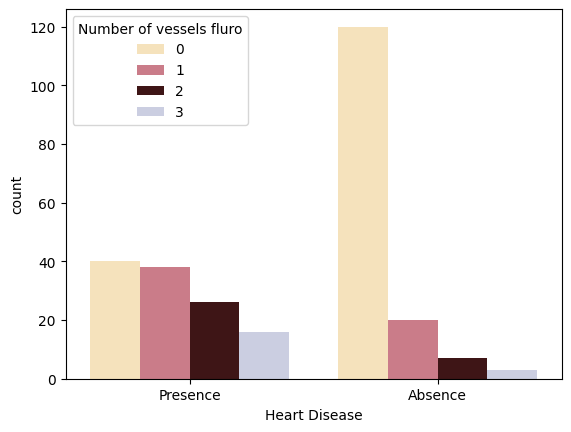

In [ ]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Number of vessels fluro', palette = [heartyellow, heartred, heartbrown, heartblue])


<Axes: xlabel='Heart Disease', ylabel='count'>

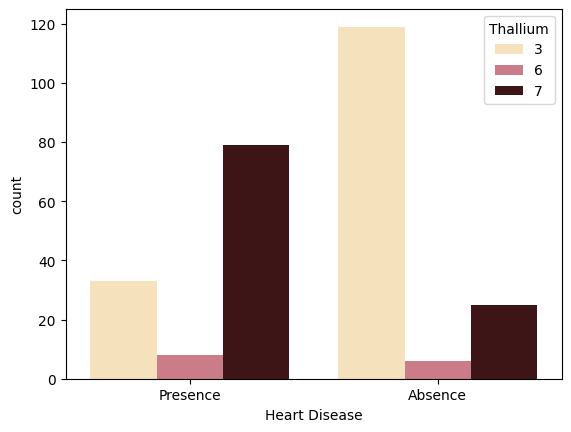

In [ ]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Thallium', palette = [heartyellow, heartred, heartbrown])

In [ ]:
#Minimum age of person diagnosed with heart disease
df.Age[df['Heart Disease'] == 'Presence'].min()

35

In [ ]:
df.groupby('Heart Disease')['Age'].mean()

,Age
Heart Disease,
Absence,52.706667
Presence,56.591667


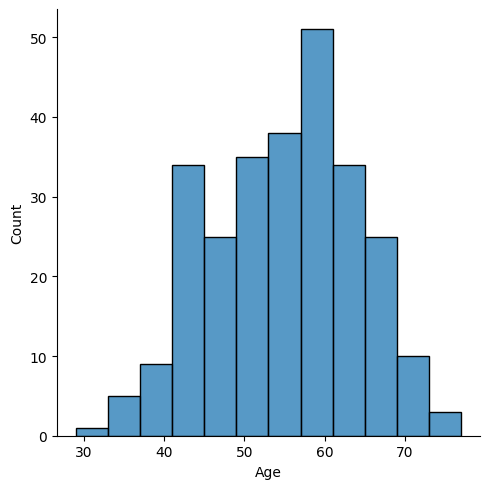

In [ ]:
sns.displot(df['Age'])

/tmp/ipython-input-389627264.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Heart Disease'],y = df['BP'], data = df, palette = [heartred, heartblue])


<Axes: xlabel='Heart Disease', ylabel='BP'>

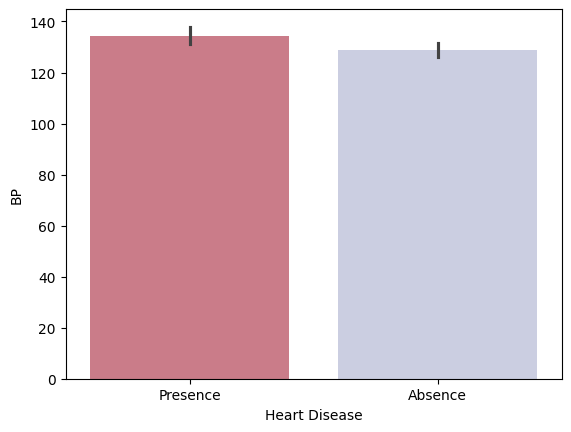

In [ ]:
sns.barplot(x = df['Heart Disease'],y = df['BP'], data = df, palette = [heartred, heartblue])

/tmp/ipython-input-4253234739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Heart Disease'],y = df['Cholesterol'], data = df, palette = [heartred, heartblue])


<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

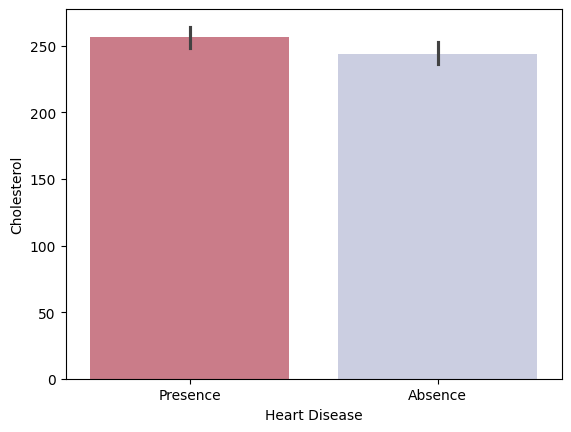

In [ ]:
sns.barplot(x = df['Heart Disease'],y = df['Cholesterol'], data = df, palette = [heartred, heartblue])

/tmp/ipython-input-3820118403.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Heart Disease'], y = df['Max HR'], data = df, palette = [heartred, heartblue])


<Axes: xlabel='Heart Disease', ylabel='Max HR'>

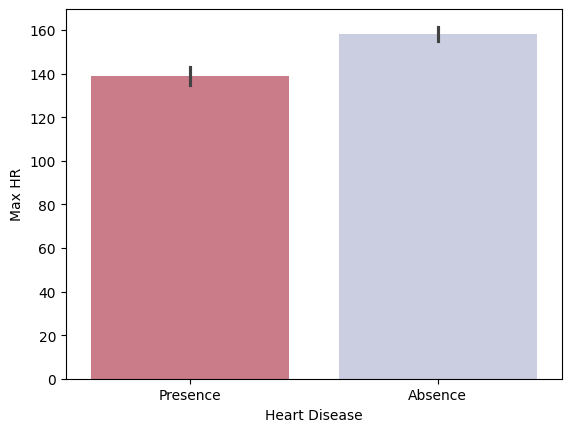

In [ ]:
sns.barplot(x = df['Heart Disease'], y = df['Max HR'], data = df, palette = [heartred, heartblue])

/tmp/ipython-input-1167391174.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Heart Disease'], y = df['ST depression'], data = df, palette = [heartred, heartblue])


<Axes: xlabel='Heart Disease', ylabel='ST depression'>

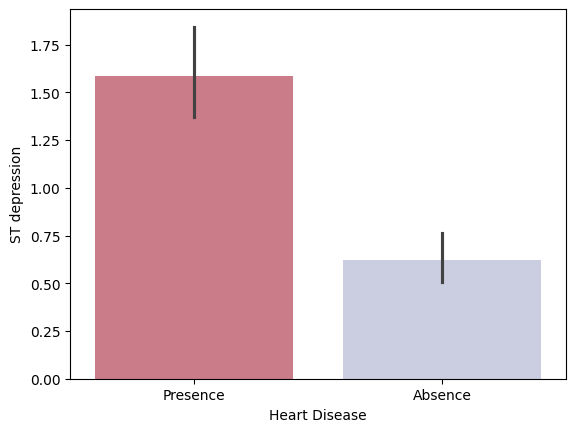

In [ ]:
sns.barplot(x = df['Heart Disease'], y = df['ST depression'], data = df, palette = [heartred, heartblue])

correlation matrix

<Axes: >

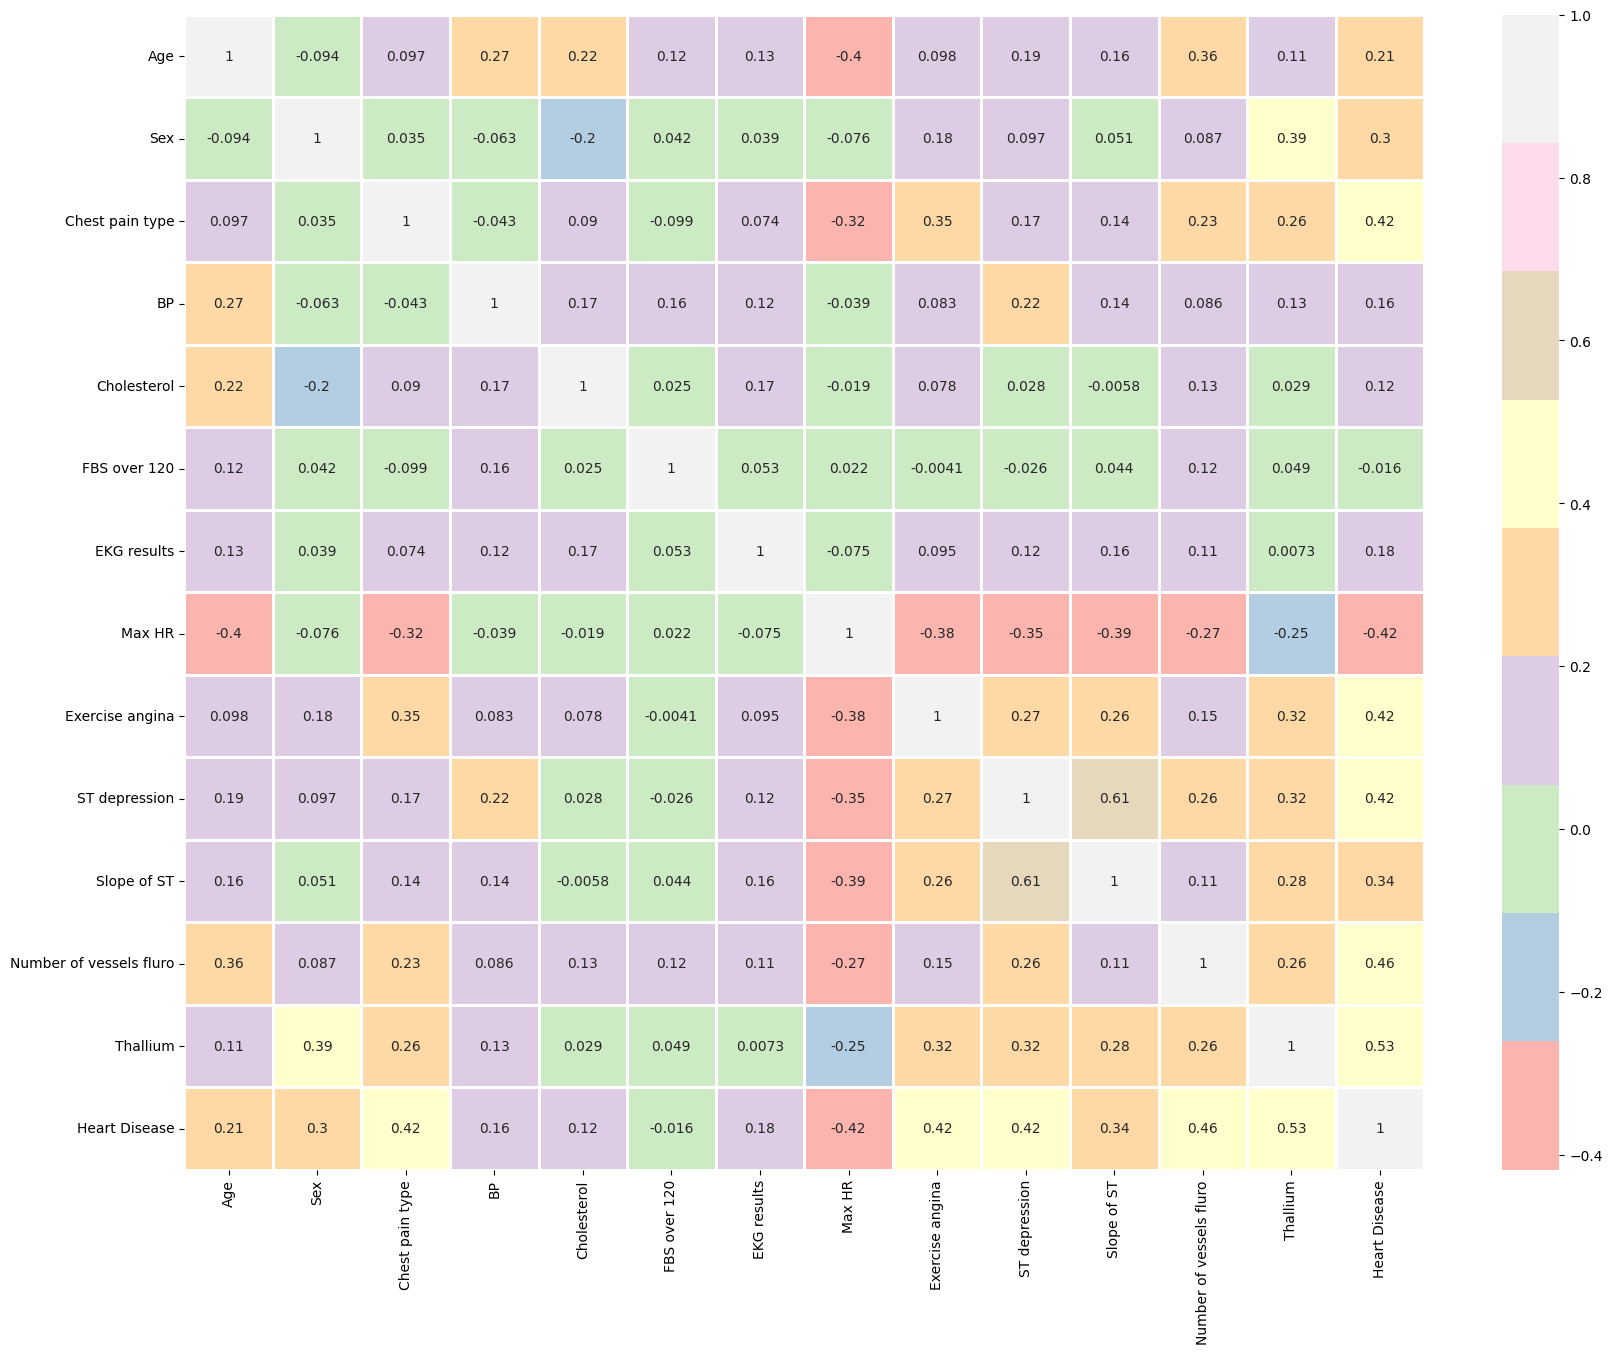

In [ ]:
plt.figure(figsize = (20,15))
# Create a temporary copy of the DataFrame to encode 'Heart Disease' column for correlation
temp_df = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp_df['Heart Disease'] = le.fit_transform(temp_df['Heart Disease'])
sns.heatmap(temp_df.corr(), annot = True, linewidths = 1, cmap = 'Pastel1')

**DATA PREPROCESSING**

Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

In [ ]:
df['Heart Disease'].head()

,Heart Disease
0,1
1,0
2,1
3,0
4,0


In [ ]:
categorical.remove('Heart Disease')
data = pd.get_dummies(df, columns = categorical)
data.head()

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,70,130,322,109,2.4,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,67,115,564,160,1.6,0,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True
2,57,124,261,141,0.3,1,False,True,False,True,...,True,False,False,True,False,False,False,False,False,True
3,64,128,263,105,0.2,0,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
4,74,120,269,121,0.2,0,True,False,False,True,...,True,False,False,False,True,False,False,True,False,False


In [ ]:
sc = StandardScaler()
scaled_col = continuous
data[scaled_col] = sc.fit_transform(data[scaled_col])
data.head()

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,1.382140,-0.916759,6.093004,0.446409,0.481153,0,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,1,False,True,False,True,...,True,False,False,True,False,False,False,False,False,True
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,0,True,False,False,True,...,True,False,False,False,True,False,False,True,False,False


In [ ]:
X = data.drop(['Heart Disease'], axis = 1)
y = data['Heart Disease']

splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Models

In [ ]:
#List for model names and their respective accuracy score
models = []
scores = []

In [ ]:
from sklearn.metrics import accuracy_score

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = accuracy_score(y_test, lr_pred)

In [ ]:
lr_score

0.8395061728395061

In [ ]:
models.append('Logistic Regression')
scores.append(lr_score)

Naive bayes

In [ ]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)

In [ ]:
nb_score

0.8271604938271605

In [ ]:
models.append('Naive Bayes')
scores.append(nb_score)

SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)

In [ ]:
svc_score

0.7901234567901234

In [ ]:
models.append('Support Vector')
scores.append(svc_score)

KNNclassifier

Text(0, 0.5, 'Error')

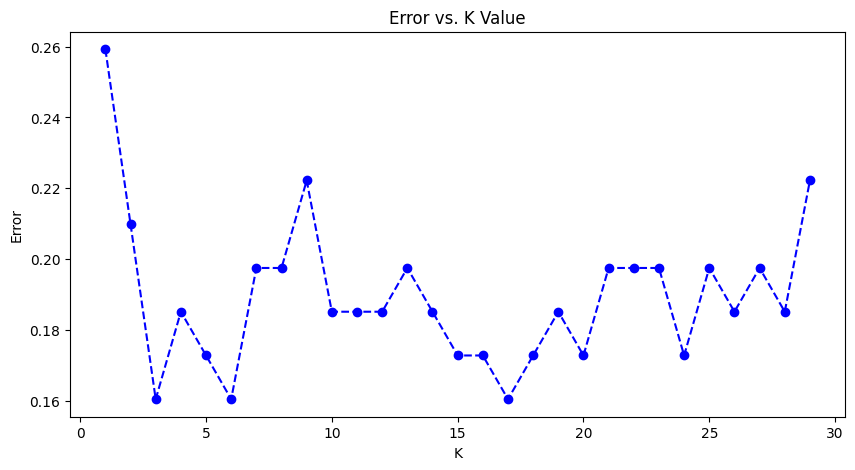

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error_knn = []
for i in range(1, 30):
 knn = KNeighborsClassifier(n_neighbors = i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error_knn.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), error_knn, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')


In [ ]:
k = error_knn.index(min(error_knn)) + 1
k

3

In [ ]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)

In [ ]:
knn_score

0.8395061728395061

In [ ]:
models.append('K Nearest Neighbours')
scores.append(knn_score)

Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
#selecting random state providing the highest accuracy
for x in range(200):
    dtc = DecisionTreeClassifier(random_state=x)
    dtc.fit(X_train,y_train)
    dtc_pred = dtc.predict(X_test)
    current_accuracy = round(accuracy_score(dtc_pred,y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


In [ ]:
dtc = DecisionTreeClassifier(random_state = best_x)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_pred)

In [ ]:
dtc_score

0.8024691358024691

In [ ]:
models.append('Decision Tree')
scores.append(dtc_score)

Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0
#selecting random state providing the highest accuracy
for x in range(200):
    rfc = RandomForestClassifier(random_state = x)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    current_accuracy = round(accuracy_score(y_test, rfc_pred)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        rfc_best_x = x

In [ ]:
rfc = RandomForestClassifier(random_state = rfc_best_x)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_pred)

In [ ]:
rfc_score

0.8518518518518519

In [ ]:
models.append('Random Forest')
scores.append(rfc_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
rfc1 = RandomForestClassifier()
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20],
    'min_samples_split':[2,5,10],
    'random_state':[0,42,50,100]
}

In [ ]:
from enum import verify
grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,scoring = 'accuracy',n_jobs=-1,verbose=1)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=124),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'random_state': [0, 42, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
best_rfc = grid.best_estimator_

In [ ]:
y_pred = best_rfc.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("best parameters:",grid.best_params_)
print("best cv accuracy:",grid.best_score_)
print("test accuracy:",accuracy)

best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 100}
best cv accuracy: 0.857325746799431
test accuracy: 0.8024691358024691


In [ ]:
rfc2 = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators= 100,random_state= 100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,rfc_pred)
accuracy

0.8518518518518519

XG Boost classifier

In [ ]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_pred)

In [ ]:
xgb_score

0.7901234567901234

In [ ]:
models.append('XGBoost')
scores.append(xgb_score)

In [ ]:
models

['Logistic Regression',
 'Naive Bayes',
 'Support Vector',
 'K Nearest Neighbours',
 'Decision Tree',
 'Random Forest',
 'XGBoost']

In [ ]:
scores

[0.8395061728395061,
 0.8271604938271605,
 0.7901234567901234,
 0.8395061728395061,
 0.8024691358024691,
 0.8518518518518519,
 0.7901234567901234]

Results

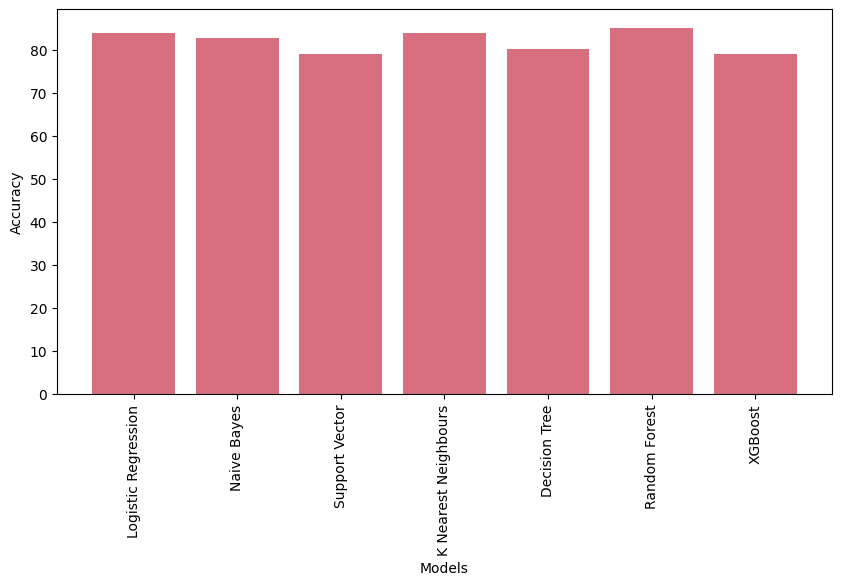

In [ ]:
percentage_scores = [score*100 for score in scores]
plt.figure(figsize=(10,5))
plt.bar(models, percentage_scores, color = heartred)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
results = pd.DataFrame(list(zip(models, percentage_scores)), columns =['Models', 'Accuracy (%)'])
results

,Models,Accuracy (%)
0,Logistic Regression,83.950617
1,Naive Bayes,82.716049
2,Support Vector,79.012346
3,K Nearest Neighbours,83.950617
4,Decision Tree,80.246914
5,Random Forest,85.185185
6,XGBoost,79.012346


confusion matrix

<Axes: >

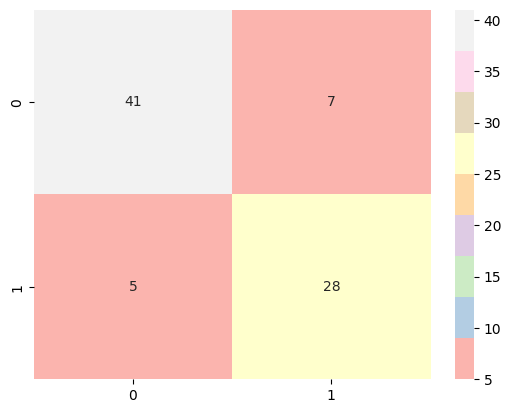

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,rfc_pred), annot = True, cmap = 'Pastel1')

classification report

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.80      0.85      0.82        33

    accuracy                           0.85        81
   macro avg       0.85      0.85      0.85        81
weighted avg       0.85      0.85      0.85        81

